In [1]:
import os.path

import tensorflow as tf
import numpy as np
import pandas as pd
from helpers import scaling,scaling_reverse, RSquaredSeparated
import h5py
from matplotlib import pyplot as plt
from scipy.signal import savgol_filter
from tensorflow.keras.utils import Progbar


2024-07-22 18:21:27.004159: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-22 18:21:27.321519: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-22 18:21:27.986373: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-22 18:21:28.992106: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
dataset = "../test_run_2_corr_10000.h5"
#dataset = "../run_5_case3b_40000.h5"
input_df = pd.read_hdf(dataset,key="input")
output_df = pd.read_hdf(dataset,key="output")


In [3]:
for i in range(115):
    print(input_df.columns[i], input_df.columns[i+115])

START_ARS01_MCOX_0740 START_ARS01_MCOY_0750
START_ARS01_MCOX_1090 START_ARS01_MCOY_1110
START_ARS01_MCOX_1470 START_ARS01_MCOY_1490
START_ARS01_MCOX_1910 START_ARS01_MCOY_1930
START_ARS01_MCOX_2420 START_ARS01_MCOY_2430
START_ARS01_MCOX_2920 START_ARS01_MCOY_2930
START_ARS01_MCOX_4230 START_ARS01_MCOY_4240
START_ARS01_MCOX_4730 START_ARS01_MCOY_4740
START_ARS01_MCOX_5260 START_ARS01_MCOY_5270
START_ARS01_MCOX_5890 START_ARS01_MCOY_5900
START_ARS02_MCOX_1090 START_ARS02_MCOY_1110
START_ARS02_MCOX_1470 START_ARS02_MCOY_1490
START_ARS02_MCOX_1910 START_ARS02_MCOY_1930
START_ARS02_MCOX_2420 START_ARS02_MCOY_2430
START_ARS02_MCOX_2920 START_ARS02_MCOY_2930
START_ARS02_MCOX_4230 START_ARS02_MCOY_4240
START_ARS02_MCOX_4730 START_ARS02_MCOY_4740
START_ARS02_MCOX_5260 START_ARS02_MCOY_5270
START_ARS02_MCOX_5890 START_ARS02_MCOY_5900
START_ARS03_MCOX_0820 START_ARS03_MCOY_0830
START_ARS03_MCOX_1090 START_ARS03_MCOY_1110
START_ARS03_MCOX_1470 START_ARS03_MCOY_1490
START_ARS03_MCOX_1910 START_ARS0

In [4]:
input_df.head()

START_ARS01_MCOX_0740  START_ARS01_MCOX_1090  START_ARS01_MCOX_1470  \
784               -0.311609              -0.242641               0.329712   
7483              -0.309220              -0.239777               0.328937   
4062              -0.311434              -0.241918               0.329609   
6727              -0.308881              -0.234913               0.334863   
3668              -0.312961              -0.240178               0.328957   

      START_ARS01_MCOX_1910  START_ARS01_MCOX_2420  START_ARS01_MCOX_2920  \
784                0.051795               0.438378               0.431899   
7483               0.051758               0.438291               0.431818   
4062               0.051719               0.438265               0.431791   
6727               0.051527               0.438222               0.431744   
3668               0.051708               0.438220               0.431747   

      START_ARS01_MCOX_4230  START_ARS01_MCOX_4730  START_ARS01_MCOX_5260  \
784                0.434502               0.434416               0.169625   
7483               0.434423               0.434334               0.169437   
4062               0.434398               0.434309               0.169670   
6727               0.434351               0.434261               0.168788   
3668               0.434353               0.434263               0.170357   

      START_ARS01_MCOX_5890  ...  ARS12_DBPM_1080_Y  ARS12_DBPM_1460_Y  \
784                0.350019  ...          -0.016692          -0.017208   
7483               0.354007  ...          -0.016249          -0.022367   
4062               0.348846  ...           0.024394           0.030975   
6727               0.352330  ...          -0.026774          -0.037192   
3668               0.353515  ...          -0.003037          -0.014573   

      ARS12_DBPM_1900_Y  ARS12_DBPM_2410_Y  ARS12_DBPM_2910_Y  \
784           -0.005818           0.004640           0.011101   
7483          -0.012238          -0.003094           0.007306   
4062           0.015745           0.002011          -0.011760   
6727          -0.022677          -0.009836           0.008394   
3668          -0.014355          -0.014540          -0.005231   

      ARS12_DBPM_4220_Y  ARS12_DBPM_4720_Y  ARS12_DBPM_5250_Y  \
784            0.009010          -0.000033          -0.010678   
7483           0.011977           0.007511          -0.001202   
4062          -0.016514          -0.008497           0.004741   
6727           0.020048           0.016318           0.004572   
3668           0.008130           0.015231           0.016765   

      ARS12_DBPM_5880_Y  ARS01_DBPM_0390_Y  
784           -0.015937          -0.029413  
7483          -0.009381          -0.034969  
4062           0.016164           0.043721  
6727          -0.010592          -0.036059  
3668           0.005962          -0.032128  

[5 rows x 460 columns]

In [5]:
output_df.head()

ARS01_MCOX_0740  ARS01_MCOX_1090  ARS01_MCOX_1470  ARS01_MCOX_1910  \
784         -0.311574        -0.240610         0.330905         0.051739   
7483        -0.311511        -0.243650         0.327237         0.051801   
4062        -0.311656        -0.237907         0.331696         0.051601   
6727        -0.313514        -0.241080         0.331394         0.051663   
3668        -0.310737        -0.242483         0.330769         0.051663   

      ARS01_MCOX_2420  ARS01_MCOX_2920  ARS01_MCOX_4230  ARS01_MCOX_4730  \
784          0.438351         0.431873         0.434479         0.434392   
7483         0.438278         0.431807         0.434415         0.434327   
4062         0.438186         0.431712         0.434318         0.434226   
6727         0.438264         0.431789         0.434394         0.434304   
3668         0.438236         0.431762         0.434367         0.434278   

      ARS01_MCOX_5260  ARS01_MCOX_5890  ...  ARS12_MCOY_1110  ARS12_MCOY_1490  \
784          0.169148         0.344117  ...        -0.634000        -0.326063   
7483         0.171102         0.355105  ...        -0.611113        -0.335223   
4062         0.169835         0.352636  ...        -0.623822        -0.330147   
6727         0.171042         0.352871  ...        -0.625968        -0.321496   
3668         0.170095         0.354628  ...        -0.611671        -0.327981   

      ARS12_MCOY_1930  ARS12_MCOY_2430  ARS12_MCOY_2930  ARS12_MCOY_4240  \
784          0.037779        -0.444930        -0.489554        -0.486590   
7483         0.038277        -0.444958        -0.489550        -0.486588   
4062         0.038003        -0.444942        -0.489551        -0.486590   
6727         0.037533        -0.444912        -0.489555        -0.486590   
3668         0.037885        -0.444934        -0.489553        -0.486589   

      ARS12_MCOY_4740  ARS12_MCOY_5270  ARS12_MCOY_5900  ARS01_MCOY_0400  
784         -0.226254        -0.325162         0.010250        -0.130875  
7483        -0.226256        -0.331074         0.016061        -0.130046  
4062        -0.226254        -0.333430        -0.007157        -0.131807  
6727        -0.226255        -0.335248        -0.009712        -0.131778  
3668        -0.226254        -0.323348         0.018595        -0.132122  

[5 rows x 230 columns]

In [6]:
input_main =  input_df.values
output = output_df.values

In [7]:
path = "/home/guney/PycharmProjects/Summerproject/out/out/2024-07-17-233820/"
paths = [path + i +"/" for i in os.listdir(path) if not i.split(".")[-1] == "h5"]

In [8]:
print(paths)

['/home/guney/PycharmProjects/Summerproject/out/out/2024-07-17-233820/2_230_0.005_0.001_0.1_-1/', '/home/guney/PycharmProjects/Summerproject/out/out/2024-07-17-233820/2_230_0.005_0.001_0.2_-1/', '/home/guney/PycharmProjects/Summerproject/out/out/2024-07-17-233820/2_230_0.005_0.001_0.4_-1/', '/home/guney/PycharmProjects/Summerproject/out/out/2024-07-17-233820/2_230_0.005_1e-05_0.1_-1/', '/home/guney/PycharmProjects/Summerproject/out/out/2024-07-17-233820/2_230_0.005_1e-05_0.2_-1/', '/home/guney/PycharmProjects/Summerproject/out/out/2024-07-17-233820/2_230_0.005_1e-05_0.4_-1/', '/home/guney/PycharmProjects/Summerproject/out/out/2024-07-17-233820/2_230_0.009_0.001_0.1_-1/', '/home/guney/PycharmProjects/Summerproject/out/out/2024-07-17-233820/2_230_0.009_0.001_0.2_-1/', '/home/guney/PycharmProjects/Summerproject/out/out/2024-07-17-233820/2_230_0.009_0.001_0.4_-1/', '/home/guney/PycharmProjects/Summerproject/out/out/2024-07-17-233820/2_230_0.009_1e-05_0.1_-1/', '/home/guney/PycharmProjects/

In [9]:

# Path to your HDF5 file
file_path = path + "Limits_scale.h5"
orbit_min =None
orbit_max = None
corr_min = None
corr_max = None
# Open the HDF5 file in read mode
with h5py.File(file_path, 'r') as hdf:
    orbit_min = np.array(hdf['orbit_min'])
    orbit_max = np.array(hdf['orbit_max'])
    corr_min = np.array(hdf['corr_min'])
    corr_max = np.array(hdf['corr_max'])
    
print(orbit_min.mean(), orbit_max.mean(),corr_max.mean(),corr_min.mean())

-0.23089906427200765 0.22432233417145978 0.404868198936857 -0.522817108172279


In [10]:
input = scaling(input_main,orbit_min,orbit_max,0,1)

print(np.min(input,axis=0))

[-5.77470440e-03 -1.49587672e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.13550487e-02 -4.10528413e-02
 -2.71487365e-04 -2.15217072e-04 -2.85940261e-04 -6.67276215e-04
 -3.71631102e-04 -2.28827325e-03 -7.88071486e-02 -4.20794749e-02
 -6.73880680e-02  0.00000000e+00 -5.46105667e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.32256883e-02
  0.00000000e+00 -1.66421988e-01  0.00000000e+00 -2.65118917e-04
 -2.24194095e-04 -2.13060225e-04 -2.12736466e-04 -2.05729457e-04
 -2.45507793e-03 -2.10383945e-02  0.00000000e+00 -1.49317743e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.51812962e-02
 -2.91934750e-02 -4.68700429e-02 -2.41896351e-04 -1.65147289e-04
 -1.56531142e-04 -8.26715173e-04 -7.33056848e-04 -2.01606619e-03
 -3.12384803e-02 -1.83804433e-02 -1.41457306e-02  0.00000000e+00
 -1.11729904e-03  0.00000

In [11]:
#normalization = tf.keras.layers.Normalization()
#normalization.adapt(input1.values)
#input1 = normalization(input1)
print(input.shape)

(10094, 460)


In [12]:
hists = []
important_paths = []
print(paths)
for i in paths[:]:
    #print(i)
    hist_path = f"/{i}/Data_simulation.h5"
    with h5py.File(hist_path, 'r') as hdf:
        loss = hdf['loss'][:]
        val_loss = hdf['val_loss'][:]
        label = i.split("/")[-2]
        print(val_loss[-1])
        if val_loss[-1] < 0.1:
            hists.append({"loss": loss, "val_loss": val_loss, "label": label,"path":i,"score": val_loss[-1]})
            #important_paths.append(i)
print(hists)

['/home/guney/PycharmProjects/Summerproject/out/out/2024-07-17-233820/2_230_0.005_0.001_0.1_-1/', '/home/guney/PycharmProjects/Summerproject/out/out/2024-07-17-233820/2_230_0.005_0.001_0.2_-1/', '/home/guney/PycharmProjects/Summerproject/out/out/2024-07-17-233820/2_230_0.005_0.001_0.4_-1/', '/home/guney/PycharmProjects/Summerproject/out/out/2024-07-17-233820/2_230_0.005_1e-05_0.1_-1/', '/home/guney/PycharmProjects/Summerproject/out/out/2024-07-17-233820/2_230_0.005_1e-05_0.2_-1/', '/home/guney/PycharmProjects/Summerproject/out/out/2024-07-17-233820/2_230_0.005_1e-05_0.4_-1/', '/home/guney/PycharmProjects/Summerproject/out/out/2024-07-17-233820/2_230_0.009_0.001_0.1_-1/', '/home/guney/PycharmProjects/Summerproject/out/out/2024-07-17-233820/2_230_0.009_0.001_0.2_-1/', '/home/guney/PycharmProjects/Summerproject/out/out/2024-07-17-233820/2_230_0.009_0.001_0.4_-1/', '/home/guney/PycharmProjects/Summerproject/out/out/2024-07-17-233820/2_230_0.009_1e-05_0.1_-1/', '/home/guney/PycharmProjects/

In [13]:
sorted_hists = sorted(hists, key=lambda hist: hist["score"])

In [14]:
print(len(sorted_hists))
print(sorted_hists[0]["score"])

12
0.00019494404725355768


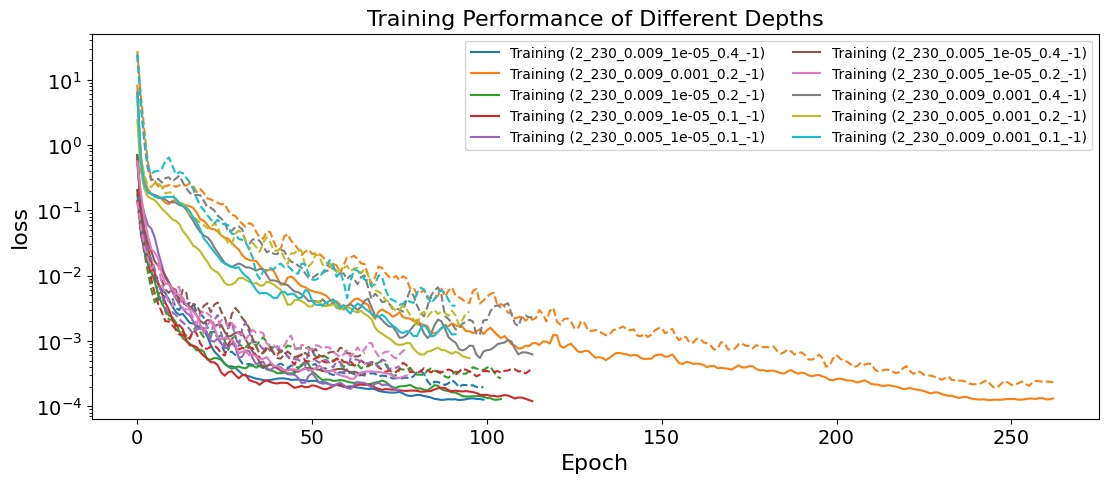

In [15]:

params = {'axes.labelsize': 16,
          'axes.titlesize': 16,
          'legend.fontsize': 10,
          'xtick.labelsize': 14,
          'ytick.labelsize': 14,}
plt.rcParams.update(params)
fig,ax = plt.subplots(1,figsize=(13,5))
ax = [ax]
colors = plt.get_cmap('tab10').colors
for i, data in enumerate(sorted_hists[:10]):
    color = colors[i]
    loss = data['loss']
    loss = savgol_filter(loss,2,1)
    val_loss = data['val_loss']
    val_loss = savgol_filter(val_loss,2,1)
    label = data['label']
    ax[0].plot(loss,label=f"Training ({label})",color = color)
    ax[0].plot(val_loss,linestyle='--',color = color) 
for axi in ax:
    axi.set_yscale('log')
    axi.legend(ncol =2)
    #axi.set_ylim(1e-3,2e-2)
    #axi.set_xlim(0,100)
    axi.set_xlabel("Epoch")
    axi.set_ylabel("loss")
    axi.set_title("Training Performance of Different Depths")
#fig.savefig("figures/test_tune_80/loss_vs_epochs.png")

In [16]:
output_scaled = scaling(output,corr_min,corr_max,0,1)

In [17]:
results = []
data = sorted_hists[:]
pg = Progbar(len(data))
for i in data:
    model_path = f"/{i['path']}/my_model_try.keras"
    model = tf.keras.models.load_model(model_path)
    #print(model.summary())
    inference =model.predict(input,verbose=0)
    unvalue = (np.mean(np.abs(inference-output_scaled)))
    inference = scaling_reverse(inference,corr_min,corr_max,0,1)
    #print(np.mean((inference-output)**2,axis=0))
    #value = (np.mean(np.abs(inference-output))/np.mean(np.abs(output))*100)
    #print(np.mean((inference-output)**2))
    value = (np.mean(np.abs(inference-output)))
    results.append({'value':value, 'label':i['label'],'un':unvalue})
    pg.add(1)

2024-07-22 18:21:56.001422: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-22 18:21:56.003268: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
I0000 00:00:1721665316.340761   10427 service.cc:145] XLA service 0x7f61f8022ca0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1721665316.340792   10427 service.cc:153]   StreamExecutor device (0): Host, Default Versi

12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step


In [34]:
np.mean(output,axis=0)

array([-0.31102519, -0.23987192,  0.33063517,  0.05177269,  0.43826487,
        0.43158303,  0.43419917,  0.43427761,  0.17002995,  0.35252017,
       -1.60542406, -0.22719905, -1.05859791, -0.55583164, -0.55160158,
       -0.54967122, -0.58556468, -0.87848611, -0.31002605, -0.15165039,
       -0.06120195,  0.3329484 , -0.27489511,  0.15483294,  0.14978875,
        0.15214301,  0.14339179, -0.08481262,  0.14427673, -0.09525609,
        0.04921758, -1.08465838, -0.56343641, -0.56016159, -0.55832849,
       -0.59412279, -0.92241458, -0.65227173,  0.3054892 , -0.24756685,
        0.46950156,  0.29672285,  0.61428808,  0.60484797,  0.60714901,
        0.6171952 ,  0.39247114, -0.47104258, -0.73657499, -0.23343125,
       -1.24111878, -0.75313701, -0.74544484, -0.74337948, -0.78617974,
       -1.09305403, -0.48183244, -0.47966084, -0.45282841,  0.1400862 ,
       -0.12149074,  0.24565604,  0.24079045,  0.24297933,  0.23881538,
       -0.03394137, -0.48385822,  0.72324623,  0.841637  ,  1.39

In [74]:
fig,ax=plt.subplots(1,figsize=(10,15),tight_layout=True)
values = [i['un'] for i in results]
label = "{}"
#labels = range(1,11)
labels = [i['label'].split("_")[-2]+"-"+i['label'].split("_")[-1] for i in results]
labels = [i['label'] for i in results]
bars = ax.bar(labels, values,color="skyblue", edgecolor="black")
ax.bar_label(bars, fmt='%.3f', padding=1)  # Add value labels on top of the bars
ax.set_yticks([])
ax.set_xlabel("Network Depth")
ax.set_ylabel("Mean Absolute Error [%]")
ax.set_title("Test Dataset Performance after 80 Epochs")
ax.tick_params(axis='x', labelrotation=90)
#plt.savefig("figures/test_tune_80/test_tune_bars.png")

In [19]:
fig,ax=plt.subplots(1,figsize=(10,15),tight_layout=True)
values = [i['value']*1e3 for i in results]
label = "{}"
#labels = range(1,11)
labels = [i['label'].split("_")[-2]+"-"+i['label'].split("_")[-1] for i in results]
labels = [i['label'] for i in results]
bars = ax.bar(labels, values,color="skyblue", edgecolor="black")
ax.bar_label(bars, fmt='%.3f', padding=1)  # Add value labels on top of the bars
ax.set_yticks([])
ax.set_xlabel("Network Depth")
ax.set_ylabel("Mean Absolute Error [mA]")
ax.set_title("Test Dataset Performance after 80 Epochs")
ax.tick_params(axis='x', labelrotation=90)
#plt.savefig("figures/test_tune_80/test_tune_bars.png")

In [26]:
results = []
for i in range(1, 7):
    model_path = path + f"/{i}/my_model_try.keras"
    model = tf.keras.models.load_model(model_path)

    value = tf.reduce_sum([tf.size(variable).numpy() for variable in model.trainable_variables])
    print(value)
    results.append({'value': value, 'depth': i})

tf.Tensor(53590, shape=(), dtype=int32)
tf.Tensor(107180, shape=(), dtype=int32)
tf.Tensor(160770, shape=(), dtype=int32)
tf.Tensor(214360, shape=(), dtype=int32)
tf.Tensor(267950, shape=(), dtype=int32)
tf.Tensor(321540, shape=(), dtype=int32)


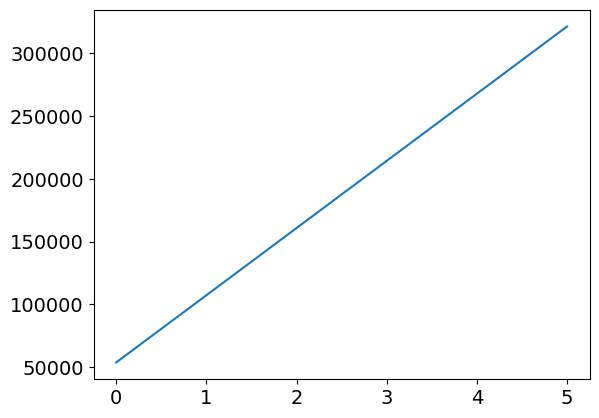

In [27]:
values = [val['value'] for val in results]
plt.plot(values)

In [ ]:
model = tf.keras.models.load_model(path+"my_model_try.keras")
model.summary()

In [ ]:
inference =model.predict(input)
inference = scaling_reverse(inference,corr_min,corr_max,0,1)

In [ ]:
np.mean(np.abs(inference-output))

In [ ]:

metric = RSquaredSeparated()
r2 = metric.call(output, inference).numpy()
r2 = pd.Series(data=r2, index=output_df.columns)
r2 = np.round(r2, decimals=5)
r2 = pd.DataFrame(r2).T
plt.figure(figsize=(10 ,6))
plt.plot(r2.iloc[0] ,'*')
plt.xticks(ticks=np.arange(0, len(r2[:].T) ,5) ,labels=r2.keys()[0::5], rotation=90)
plt.show()

In [ ]:
inputcut =np.copy(input)
inputcut[:,20] = -5

In [ ]:
 inference = model.predict(inputcut)
inference = scaling_reverse(inference, corr_min, corr_max, 0, 1)

In [ ]:
np.mean(np.abs(inference - output))

In [ ]:
metric = RSquaredSeparated()
r2 = metric.call(output, inference).numpy()
r2 = pd.Series(data=r2, index=output_df.columns)
r2 = np.round(r2, decimals=5)
r2 = pd.DataFrame(r2).T
plt.figure(figsize=(10 ,6))
plt.plot(r2.iloc[0] ,'*')
plt.xticks(ticks=np.arange(0, len(r2[:].T) ,5) ,labels=r2.keys()[0::5], rotation=90)
plt.show()